**1.** ([Boyce e Diprima, 2024](https://app.minhabiblioteca.com.br/reader/books/9788521638841/epubcfi/6/44%5B%3Bvnd.vst.idref%3Dchapter10%5D!/4/1150/100/3:66%5Best%2Co.%5D)) Sabendo que a solução $u(x, y)$ da equação de Laplace no retângulo $0<x<a, 0<y<b$, que satisfaz as condições de contorno

$$
\begin{array}{lll}
u(0, y)=0, & u(a, y)=f(y), & 0<y<b \\
u(x, 0)=0, & u_y(x, b)=0, & 0<x<a .
\end{array}
$$

é dada por

$$
u(x, y)=\sum_{n=l}^{\infty} c_n \operatorname{senh}\left(\frac{(2 n-1) \pi x}{2 b}\right) \operatorname{sen}\left(\frac{(2 n-1) \pi y}{2 b}\right)$$

com

$$c_n=\frac{2 / b}{\operatorname{senh}((2 n-1) \pi a / 2 b)} \int_0^b f(y) \operatorname{sen}\left(\frac{(2 n-1) \pi y}{2 b}\right) dy$$

Verifique, usando SymPy, que para $f(y)=y(2 b-y)$, tem-se

$$c_n=\frac{32 b^2}{(2 n-1)^3 \pi^3 \operatorname{senh}((2 n-1) \pi a / 2 b)}$$

Então, obtenha uma solução numérica para o caso de $a=3$ e $b=2$ e compare os gráficos da solução numérica e da solução exta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, sinh, pi, sum

**Obtendo uma aproximação a partir da solução exata**

In [2]:
a = 3; b = 2
cn = lambda n: (32*b**2)/((2*n-1)**3*np.pi**3*np.sinh((2*n-1)*np.pi*a/(2*b)))
n = np.arange(1,100)
nx=12; ny=8
x, y = np.meshgrid(np.linspace(0,a,nx+1),np.linspace(0,b,ny+1))

In [3]:
def u_exat(x,y):
    u = np.zeros((ny+1,nx+1))
    for n in range(1,10):
        u += cn(n)*sinh((2*n-1)*pi*x/(2*b))*sin((2*n-1)*pi*y/(2*b))
    return u

In [4]:
T_exat = np.round(u_exat(x,y),2)
#T_exat

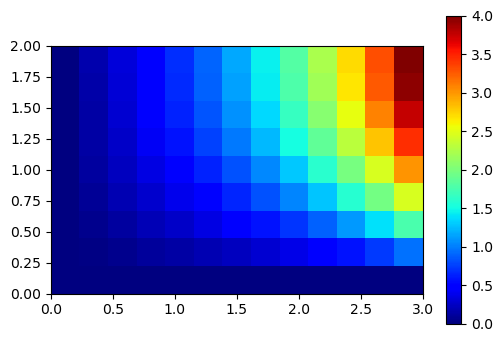

In [5]:
x, y = np.meshgrid(np.linspace(0,a,nx+1),np.linspace(0,b,ny+1))
x_mesh, y_mesh = np.meshgrid(np.linspace(0,a,nx+2),np.linspace(0,b,ny+2))
fig, ax = plt.subplots(figsize=(6, 4))
plt.pcolormesh(x_mesh, y_mesh , T_exat, cmap='jet', shading='flat') 
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

**Obtendo uma aproximação numérica por diferenças finitas**

In [6]:
a = 3; b = 2
Lx=a; Ly=b
nx=12; ny=8

In [7]:
hx = Lx/nx
hy = Ly/ny
N = (nx-1) * ny

In [8]:
nos = np.flipud(np.arange(N).T.reshape(ny,nx-1))
print(nos)

[[77 78 79 80 81 82 83 84 85 86 87]
 [66 67 68 69 70 71 72 73 74 75 76]
 [55 56 57 58 59 60 61 62 63 64 65]
 [44 45 46 47 48 49 50 51 52 53 54]
 [33 34 35 36 37 38 39 40 41 42 43]
 [22 23 24 25 26 27 28 29 30 31 32]
 [11 12 13 14 15 16 17 18 19 20 21]
 [ 0  1  2  3  4  5  6  7  8  9 10]]


In [9]:
nos.shape

(8, 11)

In [10]:
# devolve o numero do no em função da posicao (i,j)
def idx(i, j): 
    return np.flipud(nos).T[i,j]

In [11]:
y_coord = np.arange(ny+1)*hy
f = y_coord*(2*b-y_coord)
print(f)

[0.     0.9375 1.75   2.4375 3.     3.4375 3.75   3.9375 4.    ]


In [12]:
# Montagem do sistema
ax = -1.0/hx**2
ay = -1.0/hy**2
ac = -2.0*(ax + ay)

A = np.zeros((N, N), dtype=float)
b = np.zeros(N, dtype=float)

for j in range(0, ny):  
    for i in range(0, nx-1):   
        k = idx(i, j)
        A[k, k] = ac #coeficiente do nó central

        if i > 0:
            A[k, idx(i-1, j)] = ax
        else:
            b[k] -= ax * 0

        if i < nx-2:
            A[k, idx(i+1, j)] = ax
        else:
            #b[k] -= ax * 0 
            b[k] -= ax * f[j]

        if j > 0: 
            A[k, idx(i, j-1)] += ay
        else:
            b[k] -= ay * 0 
    
        if j < ny-1:  # considerando como derivada: (Ti,j-1 - Ti,j)/hy = 0 -> Ti,j-1=Ti,j
            A[k, idx(i, j+1)] += ay 
        else:
            A[k, idx(i, j)] += ay 
            #b[k] -= ay * 0 

In [13]:
T_int = np.linalg.solve(A,b)
T_int = T_int.reshape(ny,nx-1)

In [14]:
x_mesh, y_mesh = np.meshgrid(np.linspace(0,3,nx+2),
                             np.linspace(0,2,ny+2))
x_mesh.shape

(10, 14)

In [15]:
T = np.zeros((ny+1,nx+1))
T[-1,:]=0
T[:,0]=0
T[:,-1]=f

T[1:,1:-1]=T_int

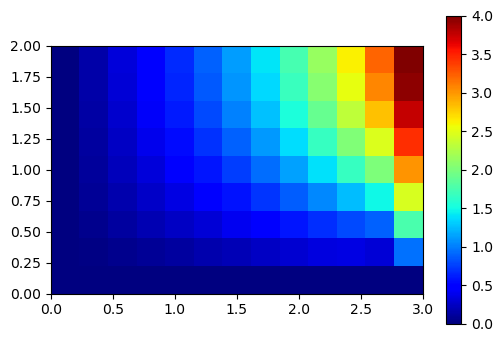

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.pcolormesh(x_mesh, y_mesh, T, cmap='jet', shading='flat') 
plt.gca().set_aspect('equal')

plt.colorbar()
plt.show()

In [17]:
err = np.abs(T_exat-T)

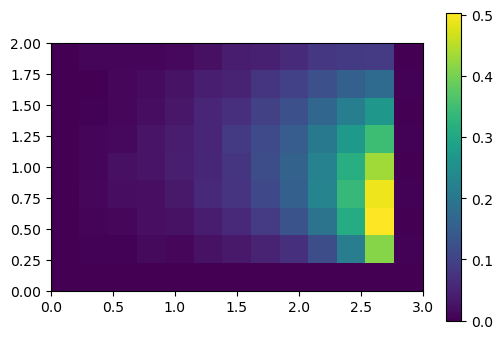

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.pcolormesh(x_mesh, y_mesh, err, shading='flat') 
plt.gca().set_aspect('equal')

plt.colorbar()
plt.show()